<a href="https://www.kaggle.com/code/abdulaziz04/powertransformer-bgm?scriptVersionId=101229146" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import BayesianGaussianMixture
from sklearn.preprocessing import RobustScaler,PowerTransformer
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv
/kaggle/input/tabular-playground-series-jul-2022/data.csv


# Loading the Dataset

In [2]:
sample=pd.read_csv('/kaggle/input/tabular-playground-series-jul-2022/sample_submission.csv')
X=pd.read_csv('/kaggle/input/tabular-playground-series-jul-2022/data.csv')

# Storing the ids and dropping it from the feature Set

In [3]:
#Storing the ids for the final submission
ids=X['id']
#Dropping it from the feature dataset
X.drop('id',axis=1,inplace=True)

In [4]:
#Checking for missing values
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98000 entries, 0 to 97999
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f_00    98000 non-null  float64
 1   f_01    98000 non-null  float64
 2   f_02    98000 non-null  float64
 3   f_03    98000 non-null  float64
 4   f_04    98000 non-null  float64
 5   f_05    98000 non-null  float64
 6   f_06    98000 non-null  float64
 7   f_07    98000 non-null  int64  
 8   f_08    98000 non-null  int64  
 9   f_09    98000 non-null  int64  
 10  f_10    98000 non-null  int64  
 11  f_11    98000 non-null  int64  
 12  f_12    98000 non-null  int64  
 13  f_13    98000 non-null  int64  
 14  f_14    98000 non-null  float64
 15  f_15    98000 non-null  float64
 16  f_16    98000 non-null  float64
 17  f_17    98000 non-null  float64
 18  f_18    98000 non-null  float64
 19  f_19    98000 non-null  float64
 20  f_20    98000 non-null  float64
 21  f_21    98000 non-null  float64
 22

#### Inertia : It measures how well a dataset was clustered by K-Means. It is calculated by measuring the distance between each data point and its centroid, squaring this distance, and summing these squares across one cluster. A good model is one with low inertia AND a low number of clusters ( K ).

In [5]:
#Storing the values of inertia
inertias = []
#Setting an estimated range for k values
K = range(1, 15)
  
for k in K:
    # Building and fitting the model
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    inertias.append(kmeanModel.inertia_)

# Attempt to find the optimal point of the cluster distribution using the well-known Elbow Method

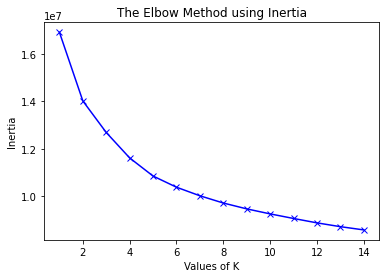

In [6]:
plt.plot(K, inertias, 'bx-')
plt.xlabel('Values of K')
plt.ylabel('Inertia')
plt.title('The Elbow Method using Inertia')
#The graph appears to be a straight line after k=7
plt.show()

## Normalizing data using RobustScaler and PowerTransformer


In [7]:
#Normalizing the dataset and also scale them
rs=RobustScaler()
X_rob=rs.fit_transform(X)

In [8]:
pt=PowerTransformer()
X_pt=pt.fit_transform(X_rob)

In [9]:
#KMeans didn't give a better results as tested in previous versions, GMM works well
bgm = BayesianGaussianMixture(n_components=7, covariance_type='full', random_state=1)
y_pred = bgm.fit_predict(X_pt)

# Building the Test Set

In [10]:
#building the test set
results=pd.DataFrame({'Id':ids,'Predicted':y_pred})
results.to_csv('submission.csv',index=False)
results

,Id,Predicted
0,0,5
1,1,4
2,2,5
3,3,6
4,4,2
...,...,...
97995,97995,4
97996,97996,1
97997,97997,3
97998,97998,0
